In [37]:
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
pd.options.display.max_columns = None

# find player id and team id

In [38]:
#list of all player id and team id
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [39]:
#convert json to pandas dataframe
team_df = pd.DataFrame(teams)
players_df = pd.DataFrame(players)

In [40]:
# Get team ID based on team name
def get_team_id(queried_team):
  for team in teams:
    if team['simpleName'] == queried_team:
      return team['teamId']
  return 'Not Found'
# Get player ID based on player name
def get_player_id(first, last):
  for player in players:
    if player['firstName'] == first and player['lastName'] == last:
      return player['playerId']
  return 'Not Found'

In [41]:
team_id = get_team_id('Mavericks')

In [42]:
player_id = get_player_id('Luka','Doncic')

# Get the data for every season of that player or team

In [43]:
#we input all the seasons we want from the nba api
seasons =['2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
#part of the season you want 'Regular Season' - 'Playoffs' - 'All-Star'
season_type = 'Regular Season'
#we retrive allthe shot information from a singular player 
shots = []
for season in seasons:
    shots.append(shotchartdetail.ShotChartDetail(team_id=0,
                                                 #put the player id found above
                                                 player_id=player_id,
                                                 #we iterate through the seasons 
                                                 season_nullable= season,
                                                #part of the season
                                                 season_type_all_star= season_type).get_data_frames()[0])


player_data = dict(zip(seasons,shots))

In [44]:
#make datasets for different season
df_18_19 = player_data['2018-19']
df_19_20 = player_data['2019-20']
df_20_21 = player_data['2020-21']
df_21_22 = player_data['2021-22']
df_22_23 = player_data['2022-23']

# Create Basketball Court

In [45]:
# Function to draw basketball court
def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=3, color=color)
    ax.plot([220, 220], [0, 140], linewidth=3, color=color)
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=3))
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=3, color=color)
    ax.plot([80, 80], [0, 190], linewidth=3, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=3, color=color)
    ax.plot([60, 60], [0, 190], linewidth=3, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=3, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=3))
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=3))

    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=3, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
        
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    # General plot parameters
    mpl.rcParams['font.family'] = 'Avenir'
    mpl.rcParams['font.size'] = 18
    mpl.rcParams['axes.linewidth'] = 2

# Seasons Visualizations

### 2018-19

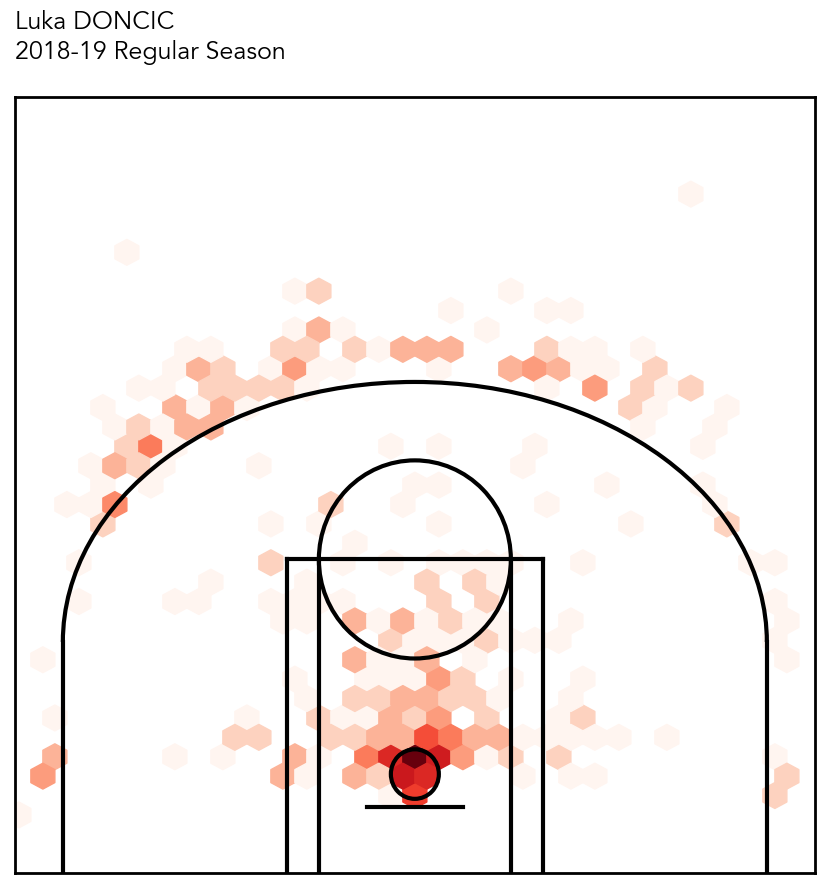

In [46]:
# Draw basketball court
s_2018_19 = plt.figure(figsize=(8, 7.76))
ax = s_2018_19.add_axes([0, 0, 1, 1])
# Plot hexbin of shots
ax.hexbin(df_18_19['LOC_X'], df_18_19['LOC_Y'] + 60, gridsize=(40, 40), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')
# Annotate player name and season
ax.text(0, 1.05, 'Luka DONCIC\n2018-19 Regular Season', transform=ax.transAxes, ha='left', va='baseline')
ax = create_court(ax, 'black')

### 2019-20

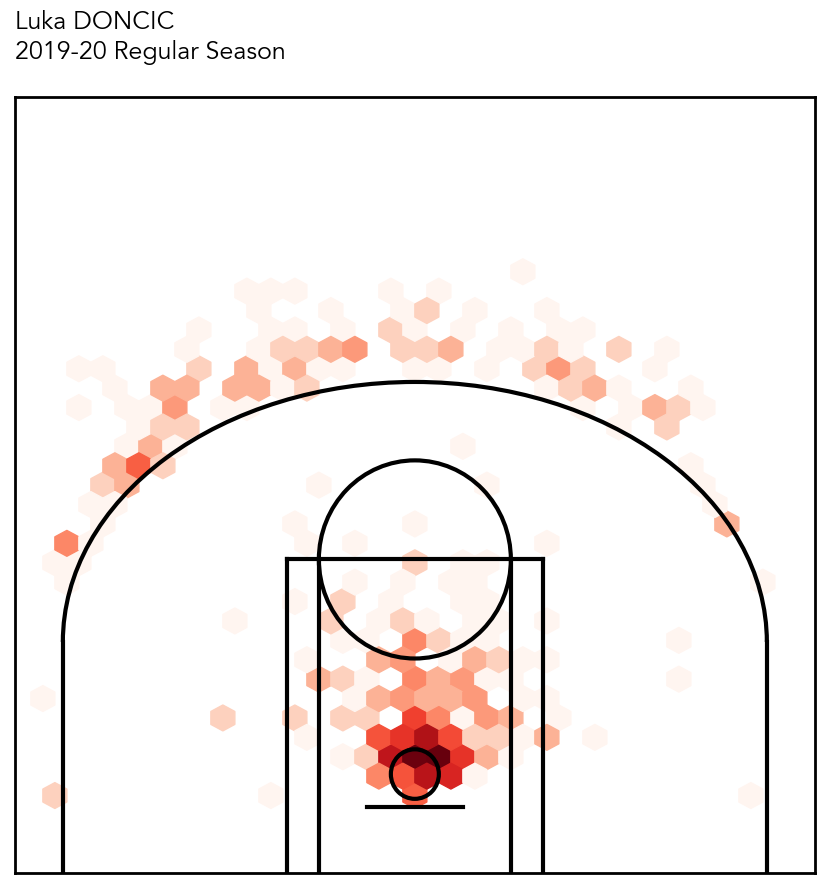

In [47]:
# Draw basketball court
s_2019_20 = plt.figure(figsize=(8, 7.76))
ax = s_2019_20.add_axes([0, 0, 1, 1])
# Plot hexbin of shots
ax.hexbin(df_19_20['LOC_X'], df_19_20['LOC_Y'] + 60, gridsize=(40, 40), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')
# Annotate player name and season
ax.text(0, 1.05, 'Luka DONCIC\n2019-20 Regular Season', transform=ax.transAxes, ha='left', va='baseline')
ax = create_court(ax, 'black')

### 2020-21

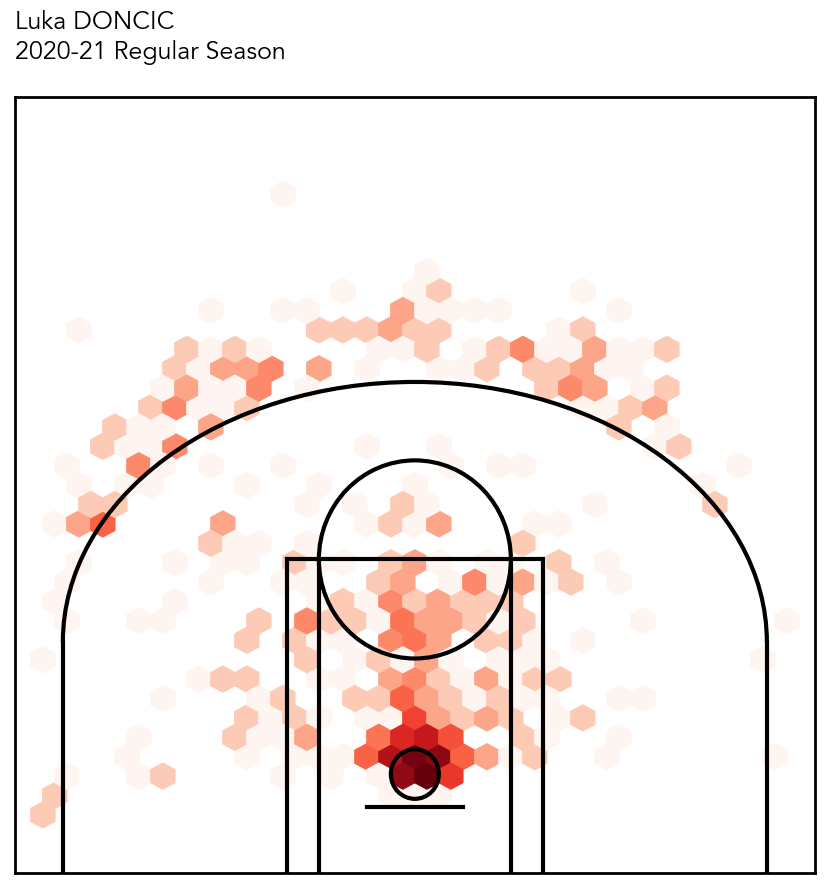

In [48]:
# Draw basketball court
s_2020_21 = plt.figure(figsize=(8, 7.76))
ax = s_2020_21.add_axes([0, 0, 1, 1])
# Plot hexbin of shots
ax.hexbin(df_20_21['LOC_X'], df_20_21['LOC_Y'] + 60, gridsize=(40, 40), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')
# Annotate player name and season
ax.text(0, 1.05, 'Luka DONCIC\n2020-21 Regular Season', transform=ax.transAxes, ha='left', va='baseline')
ax = create_court(ax, 'black')

### 2021-22

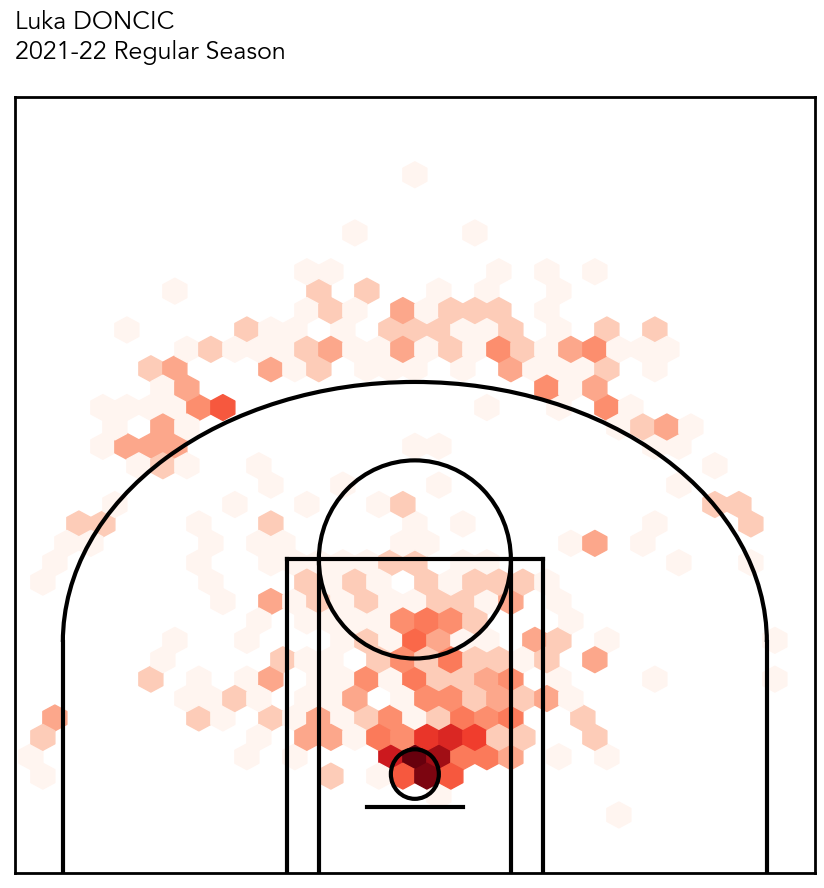

In [49]:
# Draw basketball court
s_2021_22 = plt.figure(figsize=(8, 7.76))
ax = s_2021_22.add_axes([0, 0, 1, 1])
# Plot hexbin of shots
ax.hexbin(df_21_22['LOC_X'], df_21_22['LOC_Y'] + 60, gridsize=(40, 40), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')
# Annotate player name and season
ax.text(0, 1.05, 'Luka DONCIC\n2021-22 Regular Season', transform=ax.transAxes, ha='left', va='baseline')
ax = create_court(ax, 'black')

### 2022-23

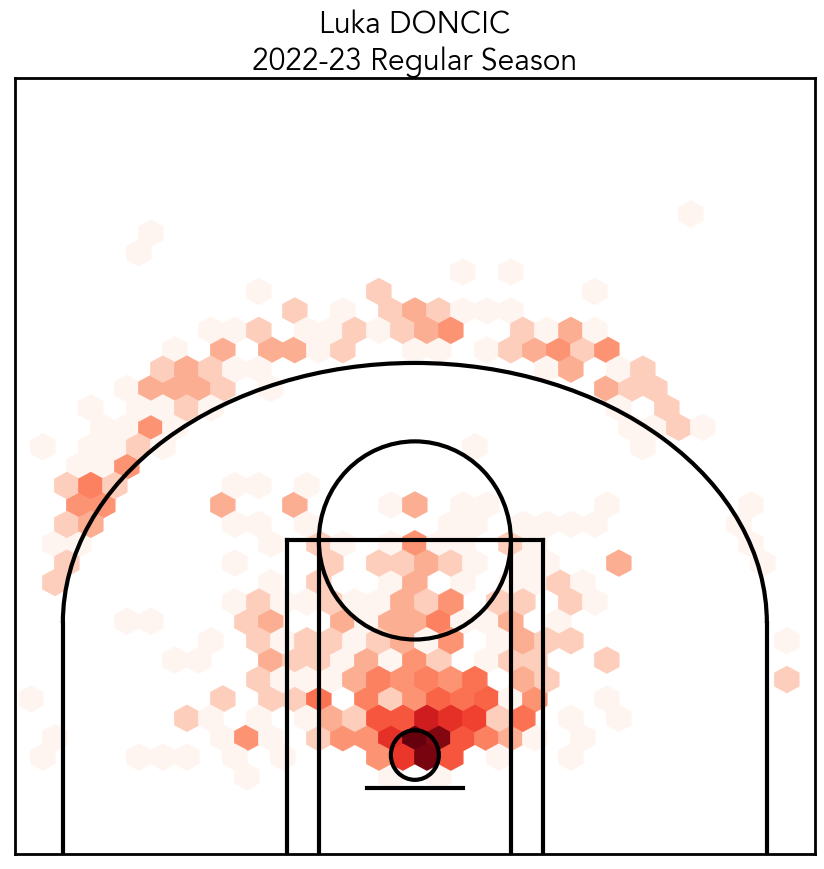

In [50]:
# Draw basketball court
s_2022_23 = plt.figure(figsize=(8, 7.76))
ax = s_2022_23.add_axes([0, 0, 1, 1])
# Plot hexbin of shots
ax.hexbin(df_22_23['LOC_X'], df_22_23['LOC_Y'] + 60, gridsize=(40, 40), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')
# Annotate player name and season
ax.set_title('Luka DONCIC\n2022-23 Regular Season')
ax = create_court(ax, 'black')

# dashboard

In [51]:
import panel as pn

In [70]:
import panel as pn

# Define the paths to the player's image and create the image pane
img_player = pn.pane.PNG('/Users/giorgio/Desktop/python/nba_shots/Luka Dončić.png', width=250)

# Create the rows for different shooting seasons
row_1 = pn.Row(s_2018_19, s_2019_20, s_2020_21)
row_2 = pn.Row(s_2021_22, s_2022_23)

# Create the final dashboard layout
dashboard = pn.Column(
    pn.Row(img_player),
    pn.Column(row_1, row_2)
)

# Create the BootstrapTemplate for the dashboard
template = pn.template.BootstrapTemplate(title='Shooting position of Luka Doncic')

# Set the main content of the template to the dashboard layout
template.main[:] = [dashboard]

# Show the dashboard
template.show()

Launching server at http://localhost:59269


BootstrapTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [140661506733104] Column
        [0] Row
            [0] PNG(str, width=250)
    [140661505424880] Column
        [0] Row
            [0] Matplotlib(Figure, height=558, width=576)
            [1] Matplotlib(Figure, height=558, width=576)
            [2] Matplotlib(Figure, height=558, width=576)
        [1] Row
            [0] Matplotlib(Figure, height=558, width=576)
            [1] Matplotlib(Figure, height=558, width=576)
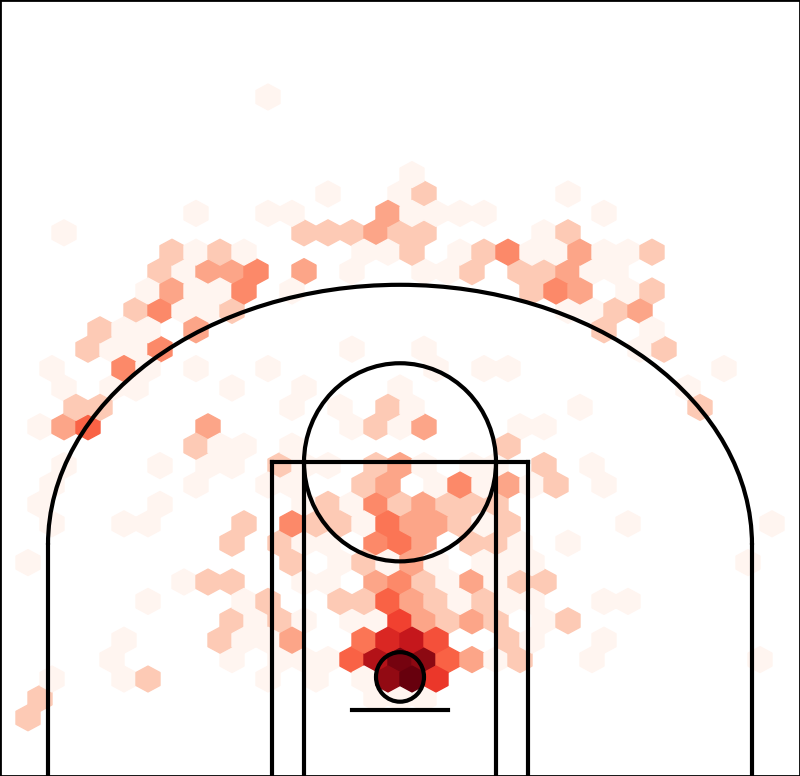
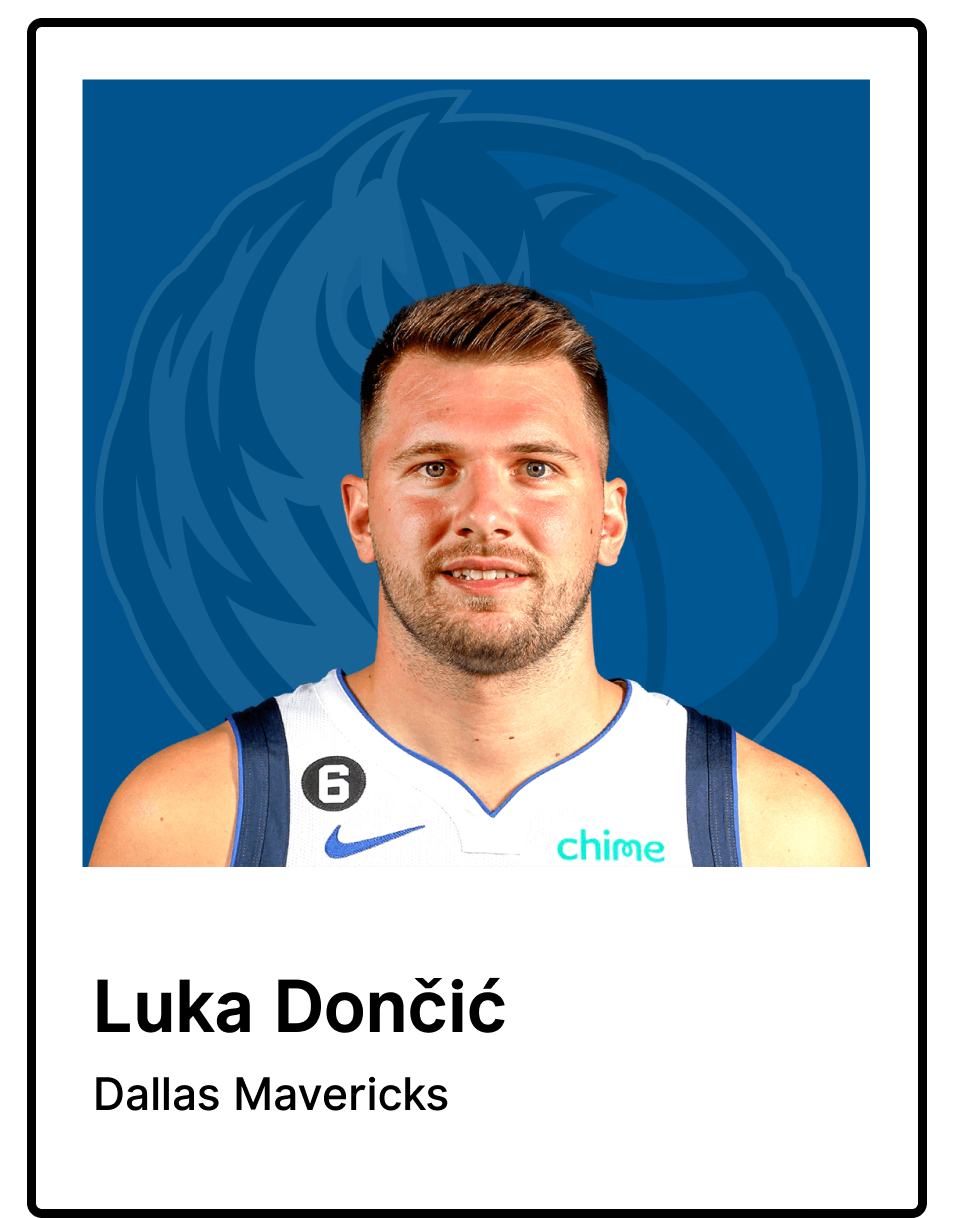
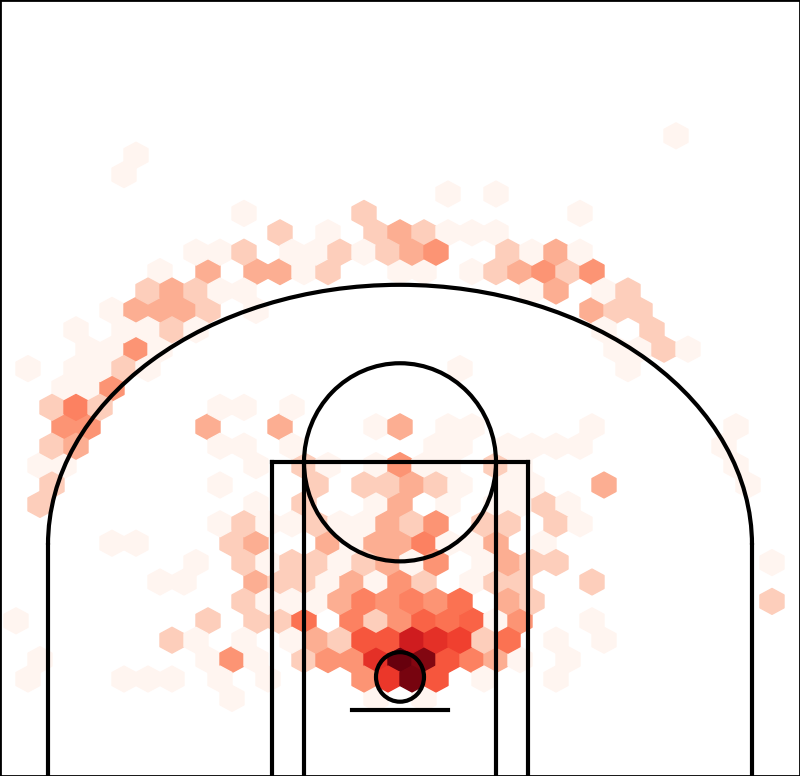
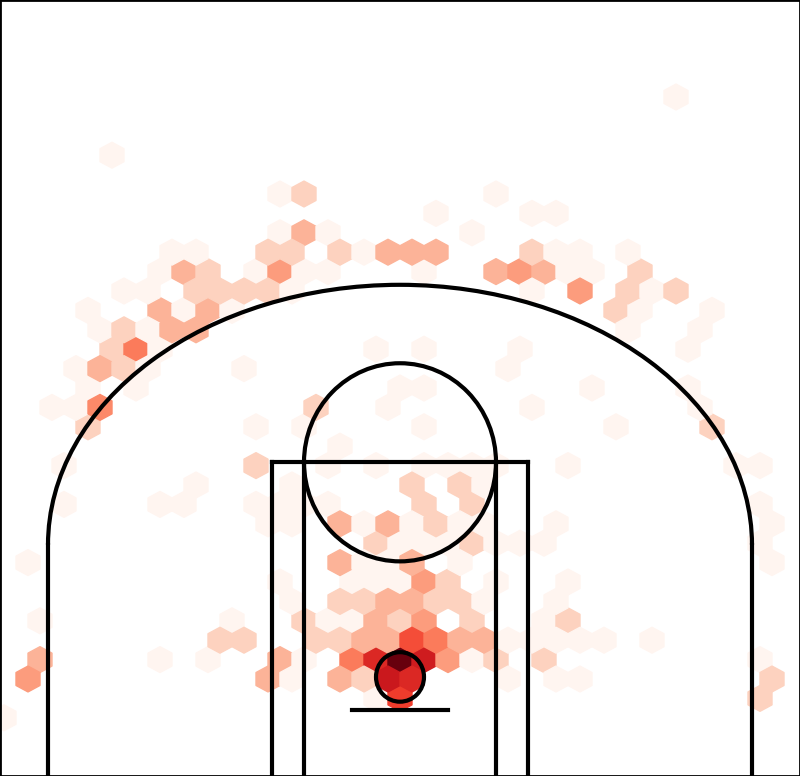
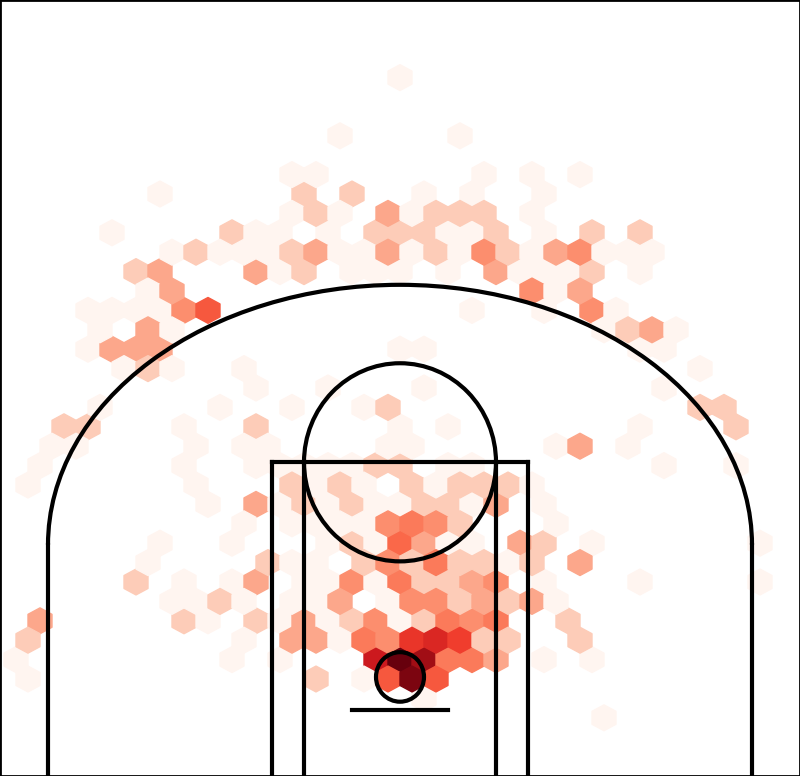
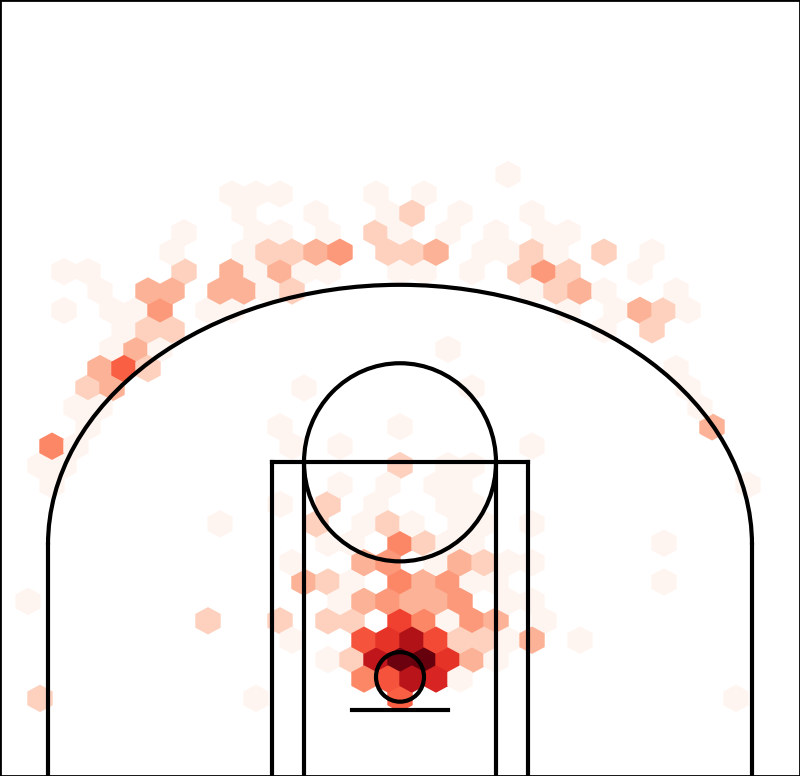

In [64]:
all.servable()

In [67]:
#save the dashboard as a html file
Case_dash.save('dashboard.html')